# We are creating Machine learning model using  healthcare stroke dataset

In [1]:
#Import the python libraries which we are going to use in this model.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
#To balance the target column (i.e stroke)
from imblearn.over_sampling import RandomOverSampler
#Import all algorithms libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#To import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load the dataset
stroke=pd.read_csv("healthcare-dataset-stroke-data.csv")

# Checking Basics things  of the dataset

In [3]:
#To see first 5 records
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#To see numbers of rows and columns
stroke.shape

(5110, 12)

In [5]:
#To see the information of all dataset
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
#To see statistical information
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
#To see names of the columns
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
#To remove unwanted column id from dataset permanently
stroke.drop('id',axis=1,inplace=True)

In [9]:
#To see random 5 rows
stroke.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3216,Female,52.0,1,0,Yes,Self-employed,Rural,104.45,NaN,never smoked,0
2135,Male,52.0,0,0,Yes,Private,Rural,191.66,26.1,smokes,0
2691,Female,45.0,0,0,No,Private,Rural,103.94,32.5,smokes,0
3686,Female,80.0,1,0,Yes,Self-employed,Urban,218.00,33.5,Unknown,0
3065,Female,61.0,0,0,Yes,Private,Urban,125.74,32.6,Unknown,0


# Doing basic Eda processing on the dataset to clean the data set

In [10]:
#To check the null values are present or not
stroke.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

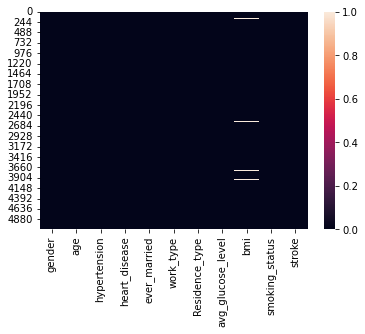

In [11]:
#To visulaize the null values
sb.heatmap(stroke.isnull())
plt.show()

In [12]:
#To see the datatypes of the columns in dataset
stroke.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [13]:
#To see the percentage of nulls in the dataset
stroke.isnull().sum()/stroke.shape[0]*100
#From this we can conclude that there is null value in bmi column
#null % is 3.9  so we cannot delete it 

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [14]:
#To fill the null values in bmi
#We are using mean of bmi column because the datatype is numeric
#So we are filling it with mean
#First find th mean of the bmi column
m=stroke['bmi'].mean()
#To fill the mean in bmi column inplace of Nan value
stroke['bmi'].fillna(m,inplace=True)

In [15]:
#Chceking null value after filiing the mean in bmi column
stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

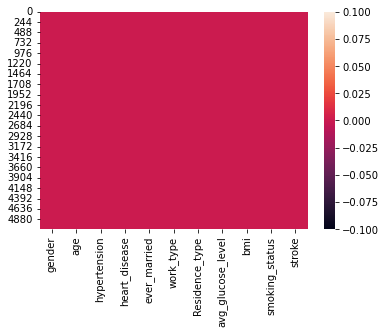

In [16]:
#To visualize the null values
sb.heatmap(stroke.isnull())
plt.show()
#As we can see the heatmap is now pink 
#This means that there is no null values present in the dataset

In [17]:
#To see the duplicate values
stroke.duplicated().sum()
#As we can see no duplicate values are present in dataset

0

In [18]:
#To check the datatype
stroke.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [19]:
#To split the dataset in numeric and categorical type
#stroke_num which will hold numeric data
stroke_num=stroke.select_dtypes(['int64','float64'])
#stroke_cat which will hold categorical data
stroke_cat=stroke.select_dtypes('object')

In [20]:
#To convert the object datatype into numeric datatye
#As machine take data in numeric so we have to convert it into numeric using LabelEncoder
#create the LabelEncoder object
le=LabelEncoder()
for i in stroke_cat:
    stroke_cat[i]=le.fit_transform(stroke_cat[i])

In [21]:
#To check if the stroke_cat is converted to numeric or not
stroke_cat.dtypes
#As we can see it is converted

gender            int32
ever_married      int32
work_type         int32
Residence_type    int32
smoking_status    int32
dtype: object

In [22]:
#Joining both the datasets
stroke_new=pd.concat([stroke_num,stroke_cat],axis=1)

In [23]:
# To see first 5 values of new dataset
stroke_new.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.600000,1,1,1,2,1,1
1,61.0,0,0,202.21,28.893237,1,0,1,3,0,2
2,80.0,0,1,105.92,32.500000,1,1,1,2,0,2
3,49.0,0,0,171.23,34.400000,1,0,1,2,1,3
4,79.0,1,0,174.12,24.000000,1,0,1,3,0,2


In [24]:
#So the target output is stroke which is in discrete value having binary class(i.e 0,1)
#So we are going to apply classification to create the model
#First we have to check if output is balance or not

# To see the output variable is balance or not?

In [25]:
#First we have to see how many values are there in stroke column
stroke_new['stroke'].unique()

array([1, 0], dtype=int64)

In [26]:
#To see how many numbers of 0 and 1 in stroke column
stroke_new['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

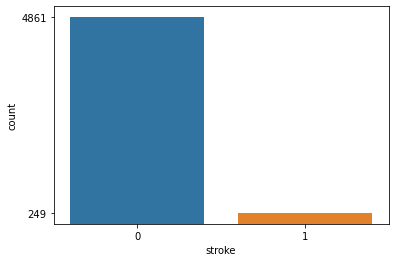

In [27]:
#To visulaize the stroke column to see if it is balance or not
sb.countplot(data=stroke_new,x='stroke')
f=stroke_new['stroke'].value_counts()
plt.yticks(f)
plt.show()
#As we can clearly see that the column is unbalanced
#We will balance it further

# Doing some visualisation on the dataset:-

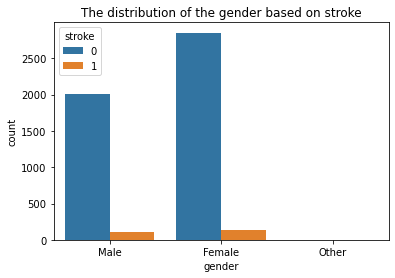

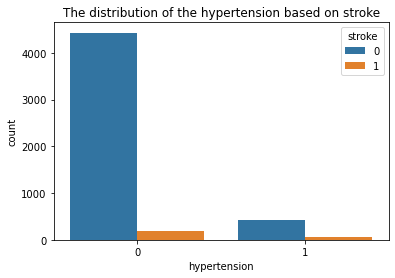

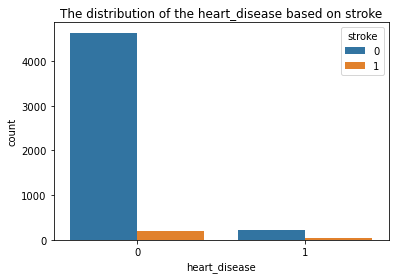

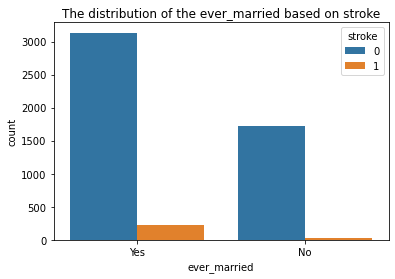

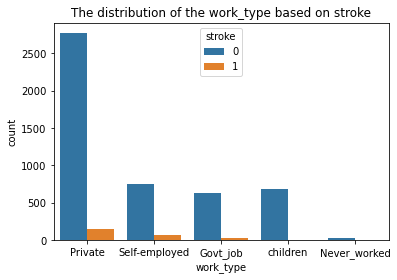

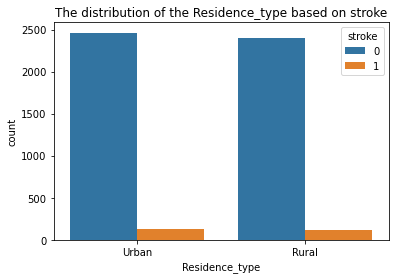

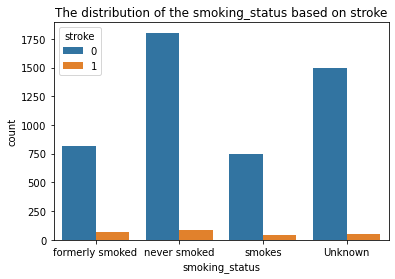

In [28]:
#Here we are using loop to make the graph using distplot with object and int values in the dataset
#Selecting the inputs which we want to visualize 
A=stroke[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]
for i in A:
    sb.countplot(data=stroke,x=i,hue='stroke')
    plt.title('The distribution of the {} based on stroke'.format(i))
    plt.show()  

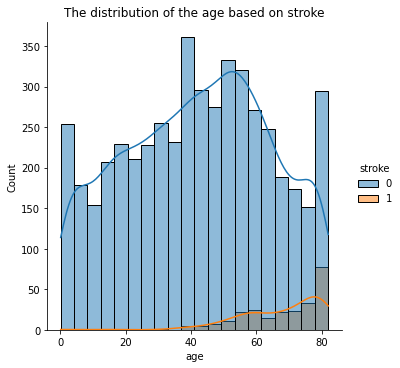

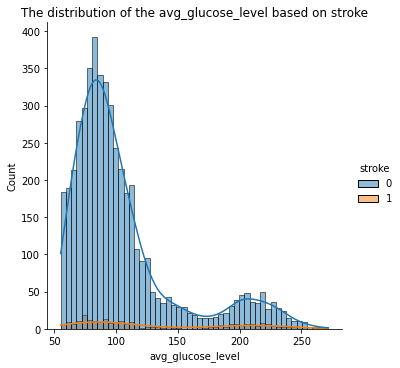

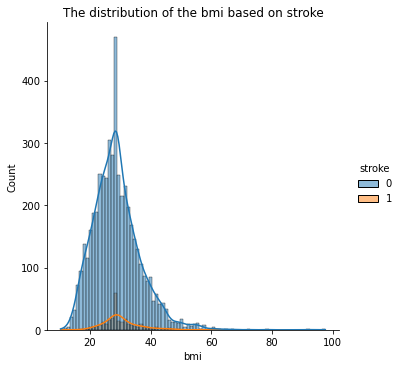

In [29]:
#Here we are using loop to make the graph using distplot with float values in the dataset
A=stroke[['age','avg_glucose_level','bmi']]
for i in A:
    sb.displot(data=stroke,x=i,hue ='stroke',kde=True)
    plt.title('The distribution of the {} based on stroke'.format(i))
    plt.show()

In [30]:
# Now we are selecting input and output for making the model
X=stroke_new.drop('stroke',axis=1) #input 
Y=stroke_new['stroke'] #output

# Spliting the data and applying the scaling

In [31]:
#Here we are dividing the data in 70% training and 30% testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [32]:
#To see the shape of the training data
X_train.shape,Y_train.shape

((3577, 10), (3577,))

In [33]:
#To see the shape of the testing data
X_test.shape,Y_test.shape

((1533, 10), (1533,))

# Applying scaling on the input data

In [34]:
#We are using StandardScaler
#We do scaling because we give data to machine in same unit
#First create the StandardScaler object
ss=StandardScaler()
#Applying the scaling on X_train and X_test
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

# Now we have to balance the output  as it is imbalance

In [35]:
#We use RandomOverSampler
#As RandomOverSampler convert the minority-sample to majority-sample
#create the object
ros=RandomOverSampler(random_state=1)
#To apply ros in training dataset
X_train,Y_train=ros.fit_resample(X_train,Y_train)
#To apply ros in testing dataset
X_test,Y_test=ros.fit_resample(X_test,Y_test)

In [36]:
#To see that the training data is balance or not
Y_train.value_counts()
#As we can see that the training data is balanced

0    3411
1    3411
Name: stroke, dtype: int64

In [37]:
#To see that the testing data is balance or not
Y_test.value_counts()
#As we can see that the training data is balanced
#Now the data is balanced

0    1450
1    1450
Name: stroke, dtype: int64

# Creating the function to speedup the model building process

In [38]:
#We create the model which train,test, give classification_report and confusion_matrix
#It saves the time
def model(model):
    #To train the data
    model.fit(X_train,Y_train)
    #To test the data
    Y_pred=model.predict(X_test)
    #To give classification_report
    print(classification_report(Y_test,Y_pred))
    #To give confusion_matrix
    print(confusion_matrix(Y_test,Y_pred))
    return model

# Applying LogisticRegression

In [39]:
#create the object of LogisticRegression
lr=LogisticRegression()
#Give the object to the function
lr=model(lr)
#Here in this dataset we have to see recall score as we want to predict person will get stroke or not
#So in LogisticRegression the accuracy of 1-85% and 0-77%
#It is good but can be better

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1450
           1       0.75      0.85      0.80      1450

    accuracy                           0.78      2900
   macro avg       0.79      0.78      0.78      2900
weighted avg       0.79      0.78      0.78      2900

[[1048  402]
 [ 223 1227]]


# Applying DecisionTreeClassifier using gini index

In [40]:
#We use DecisionTreeClassifier because in LogisticRegression we do not have automatic feature selection method
#DecisionTree helps to get important features and get better accuracy there are two ways 
#.gini-index(by default)
#.entropy
#So to create the object for DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1) #bydefault gini-index
#Give the object to function
dt=model(dt)
#Using DecisionTreeClassifier we got accuarcy of 1-14% and 0-97%
#Accuarcy is very bad so we are going to use pruning method

              precision    recall  f1-score   support

           0       0.53      0.97      0.69      1450
           1       0.82      0.14      0.23      1450

    accuracy                           0.55      2900
   macro avg       0.68      0.55      0.46      2900
weighted avg       0.68      0.55      0.46      2900

[[1408   42]
 [1252  198]]


In [41]:
#To see Information gain of this DecisionTree
#We make DataFrame to see the Information gain
dict={'Input':X.columns,'Ig':dt.feature_importances_}
df=pd.DataFrame(dict)
df.sort_values('Ig',ascending=False,ignore_index=True)

,Input,Ig
0,age,0.431808
1,bmi,0.238788
2,avg_glucose_level,0.206941
3,smoking_status,0.038665
4,Residence_type,0.023171
5,work_type,0.021729
6,gender,0.018115
7,heart_disease,0.008989
8,ever_married,0.006253
9,hypertension,0.005541


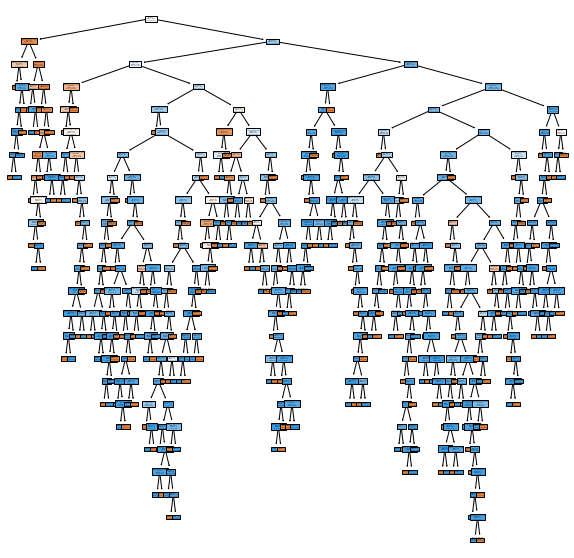

In [42]:
#To make the DecisionTree
features=X.columns
plt.figure(figsize=(10,10))
_=tree.plot_tree(dt,feature_names=features,filled=True)

# Applying pruning method using gini index

In [43]:
#We use purning method on decisiontreeclassifier because decisiontree take features having 
#minimum information also so there are chances that the dataset becomes overfit
#So to avoid overfitting we use purning methods
#There are 2 types:-
#1.max_depth
#2.min_samples_leaf

# Applying  max_depth pruning method using gini index 

In [44]:
#In max_depth we cut the branches of the DecisionTree whose features are less important
#We are using for loop to see the accuracy in max_depth range 1-8
"""for i in range(8,0,-1):
    #create the object 
    dt1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("No of depth: ",i)
    #Give the object to the function
    dt1=model(dt1)"""
#We got the good accuracy at max_depth=4
#create the object 
dt1=DecisionTreeClassifier(random_state=1,max_depth=4)   #bydefault gini-index
print("No of depth: ",4)
#Give the object to the function
dt1=model(dt1)
#Using max_depth with gini-index we got accuracy of 1-80% and 0-74%

No of depth:  4
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1450
           1       0.76      0.80      0.78      1450

    accuracy                           0.77      2900
   macro avg       0.77      0.77      0.77      2900
weighted avg       0.77      0.77      0.77      2900

[[1079  371]
 [ 297 1153]]


In [45]:
#To see Information gain of this max_depth using gini-index
#We make DataFrame to see the Information gain
dict={'Input':X.columns,'Ig':dt1.feature_importances_}
df=pd.DataFrame(dict)
df.sort_values('Ig',ascending=False,ignore_index=True)

,Input,Ig
0,age,0.837789
1,bmi,0.089239
2,avg_glucose_level,0.061501
3,ever_married,0.007924
4,Residence_type,0.003547
5,hypertension,0.000000
6,heart_disease,0.000000
7,gender,0.000000
8,work_type,0.000000
9,smoking_status,0.000000


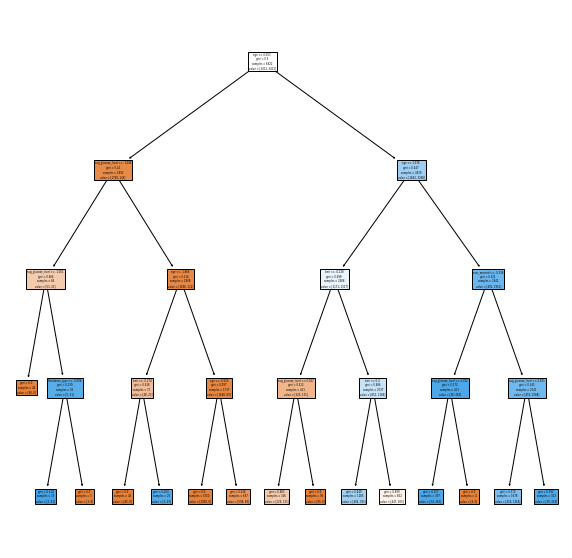

In [46]:
#To make the DecisionTree of max_depth using gini-index
features=X.columns
plt.figure(figsize=(10,10))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

# Applying min_samples_leaf pruning method using gini index

In [47]:
#The min_samples_leaf is having no child leaf node 
#The number of leaf should ne from 45-100
"""#We use for loop to see accuracy
for i in range(45,101):
    #create the object
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("Number of leafs: ",i)
    #Give object to function
    dt2=model(dt2)"""
#We got the best accuarcy at min_samples_leaf at 80
#create the object
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=80)
print("Number of leafs: ",80)
#Give object to function
dt2=model(dt2)
#So we got the best accuracy at min_samples_leaf at 80
#Accuarcy of 1-70% and 0-76%

Number of leafs:  80
              precision    recall  f1-score   support

           0       0.72      0.76      0.73      1450
           1       0.74      0.70      0.72      1450

    accuracy                           0.73      2900
   macro avg       0.73      0.73      0.73      2900
weighted avg       0.73      0.73      0.73      2900

[[1095  355]
 [ 435 1015]]


In [48]:
#To see Information gain of this min_samples_leaf using gini-index 
#We make DataFrame to see the Information gain
dict={'Input':X.columns,'Ig':dt2.feature_importances_}
df=pd.DataFrame(dict)
df.sort_values('Ig',ascending=False,ignore_index=True)

,Input,Ig
0,age,0.675922
1,bmi,0.161235
2,avg_glucose_level,0.094710
3,Residence_type,0.023134
4,smoking_status,0.015187
5,heart_disease,0.014005
6,ever_married,0.005907
7,gender,0.005578
8,hypertension,0.004322
9,work_type,0.000000


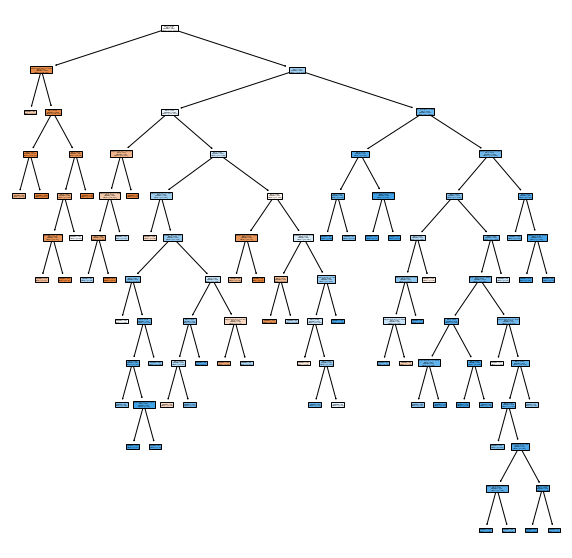

In [49]:
#To make the DecisionTree of min_samples_leaf using gini-index
features=X.columns
plt.figure(figsize=(10,10))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

# Applying DecisionTreeClassifier using entropy

In [50]:
#Using entropy everything is same as we perform in gini index 
#But only we have to add extra parameter criterion=entropy
#which means we will use entropy inplace of gini-index
#So to create the object for DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1,criterion='entropy') #using entropy
#Give the object to function
dtc=model(dtc)
#Using DecisionTreeClassifier we got accuarcy of 1-16% and 0-96%
#Accuarcy is very bad so we are going to use pruning method


              precision    recall  f1-score   support

           0       0.53      0.96      0.69      1450
           1       0.81      0.16      0.27      1450

    accuracy                           0.56      2900
   macro avg       0.67      0.56      0.48      2900
weighted avg       0.67      0.56      0.48      2900

[[1396   54]
 [1218  232]]


In [51]:
#To see Information gain of this DecisionTree using entropy
#We make DataFrame to see the Information gain
dict={'Input':X.columns,'Ig':dtc.feature_importances_}
df=pd.DataFrame(dict)
df.sort_values('Ig',ascending=False,ignore_index=True)

,Input,Ig
0,age,0.366996
1,bmi,0.253902
2,avg_glucose_level,0.201186
3,work_type,0.047047
4,smoking_status,0.046272
5,gender,0.029106
6,Residence_type,0.026635
7,heart_disease,0.012984
8,hypertension,0.010954
9,ever_married,0.004917


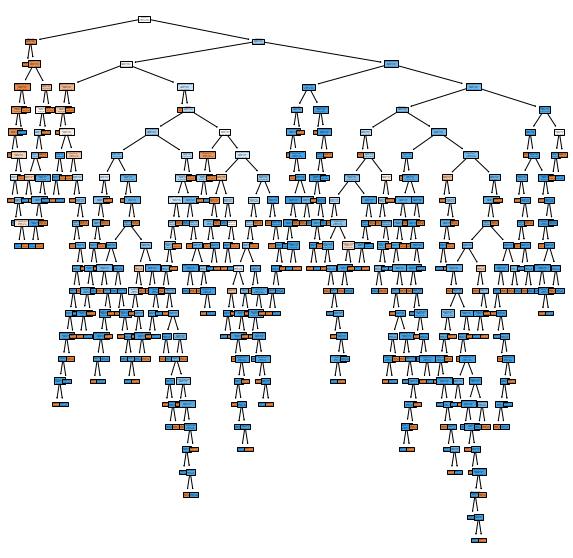

In [52]:
#To make the DecisionTree using entropy
features=X.columns
plt.figure(figsize=(10,10))
_=tree.plot_tree(dtc,feature_names=features,filled=True)

# Applying max_depth pruning technique using entropy

In [53]:
#We are using for loop to see the accuracy in max_depth range 1-8
"""for i in range(8,0,-1):
    #create the object 
    dtc1=DecisionTreeClassifier(random_state=1,max_depth=i,criterion='entropy')
    print("No of depth: ",i)
    #Give the object to the function
    dtc1=model(dtc1)"""
#We got the good accuracy at max_depth=5
#create the object 
dtc1=DecisionTreeClassifier(random_state=1,max_depth=5,criterion='entropy')   #using entropy
print("No of depth: ",5)
#Give the object to the function
dtc1=model(dtc1)
#Using max_depth with gini-index we got accuracy of 1-78% and 0-75%

No of depth:  5
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1450
           1       0.76      0.78      0.77      1450

    accuracy                           0.76      2900
   macro avg       0.76      0.76      0.76      2900
weighted avg       0.76      0.76      0.76      2900

[[1085  365]
 [ 322 1128]]


In [54]:
#To see Information gain of this max_depth using entropy
#We make DataFrame to see the Information gain
dict={'Input':X.columns,'Ig':dtc1.feature_importances_}
df=pd.DataFrame(dict)
df.sort_values('Ig',ascending=False,ignore_index=True)

,Input,Ig
0,age,0.681928
1,avg_glucose_level,0.136782
2,bmi,0.102215
3,work_type,0.040662
4,gender,0.020038
5,ever_married,0.010201
6,hypertension,0.006268
7,smoking_status,0.001906
8,heart_disease,0.000000
9,Residence_type,0.000000


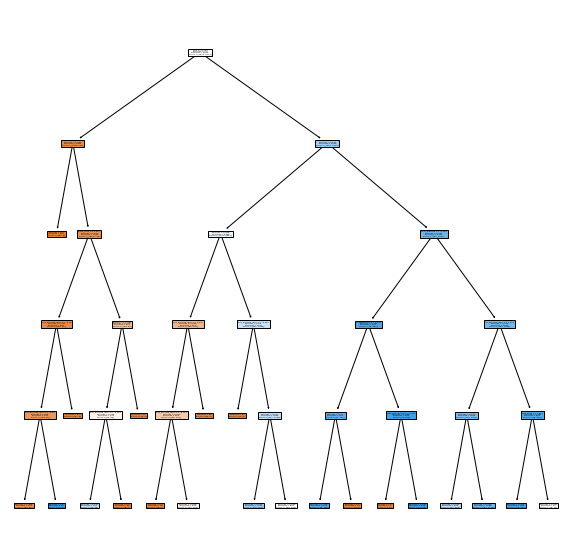

In [55]:
#To make the DecisionTree of max_depth using entropy
features=X.columns
plt.figure(figsize=(10,10))
_=tree.plot_tree(dtc1,feature_names=features,filled=True)

# Applying min_samples_leaf  pruning technique using entropy

In [56]:
#We use for loop to see accuracy
"""for i in range(45,101):
    #create the object
    dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy')
    print("Number of leafs: ",i)
    #Give object to function
    dtc2=model(dtc2)"""
#We got the best accuarcy at min_samples_leaf at 72
#create the object
dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=72,criterion='entropy')
print("Number of leafs: ",72)
#Give object to function
dtc2=model(dtc2)
#So we got the best accuracy at min_samples_leaf at 72
#Accuarcy of 1-70% and 0-74%

Number of leafs:  72
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1450
           1       0.73      0.70      0.71      1450

    accuracy                           0.72      2900
   macro avg       0.72      0.72      0.72      2900
weighted avg       0.72      0.72      0.72      2900

[[1074  376]
 [ 436 1014]]


In [57]:
#To see Information gain of this min_samples_leaf using entropy
#We make DataFrame to see the Information gain
dict={'Input':X.columns,'Ig':dtc2.feature_importances_}
df=pd.DataFrame(dict)
df.sort_values('Ig',ascending=False,ignore_index=True)

,Input,Ig
0,age,0.592244
1,avg_glucose_level,0.151261
2,bmi,0.145090
3,Residence_type,0.029925
4,work_type,0.026492
5,gender,0.017608
6,heart_disease,0.015757
7,ever_married,0.008046
8,smoking_status,0.007108
9,hypertension,0.006471


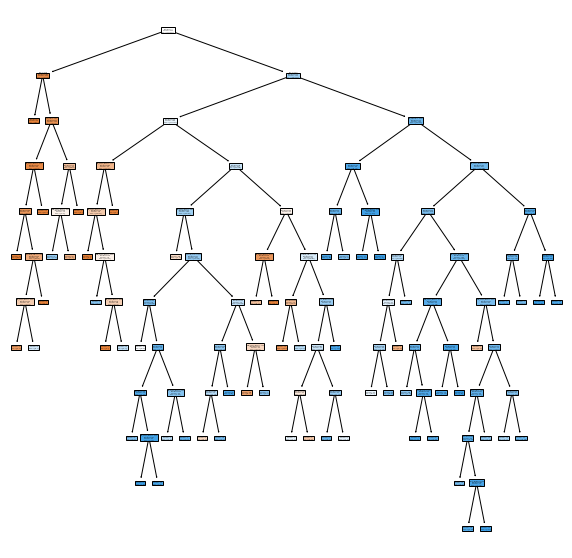

In [58]:
#To make the DecisionTree of min_samples_leaf using entropy
features=X.columns
plt.figure(figsize=(10,10))
_=tree.plot_tree(dtc2,feature_names=features,filled=True)

# Applying RandomForestClassifier using gini-index

In [59]:
#Now we are using ensembling technique first we are going to see RandomForestClassifier using gini-index
"""#Using for loop to see accuarcy
for i in range(10,0,-1):
    #create the object
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)
    print("No of features: ",i)
    #Give object to the function
    rfc=model(rfc)"""
#create the object
rfc=RandomForestClassifier(n_estimators=10,max_features=5,random_state=1)
print("No of features: ",5)
#Give object to the function
rfc=model(rfc)    
#As we can see we did'nt get good accuarcy
#We got accuracy of 0-98% and 1-07% at max_feature=5 using gini index

No of features:  5
              precision    recall  f1-score   support

           0       0.51      0.98      0.67      1450
           1       0.80      0.07      0.12      1450

    accuracy                           0.53      2900
   macro avg       0.66      0.53      0.40      2900
weighted avg       0.66      0.53      0.40      2900

[[1426   24]
 [1353   97]]


# Applying RandomForestClassifier using entropy

In [60]:
#Now we are using RandomForestClassifier using entropy
"""#Using for loop to see accuarcy
for i in range(10,0,-1):
    #create the object
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1,criterion='entropy')
    print("No of features: ",i)
    #Give object to the function)
    rfc=model(rfc)"""
#create the object
rfc=RandomForestClassifier(n_estimators=10,max_features=8,random_state=1,criterion='entropy')
print("No of features: ",8)
#Give object to the function)
rfc=model(rfc)
#As we can see we did'nt get good accuarcy
#We got accuracy of 0-98% and 1-10% at max_feature=8 using entropy

No of features:  8
              precision    recall  f1-score   support

           0       0.52      0.98      0.68      1450
           1       0.83      0.10      0.18      1450

    accuracy                           0.54      2900
   macro avg       0.68      0.54      0.43      2900
weighted avg       0.68      0.54      0.43      2900

[[1420   30]
 [1303  147]]


# Using AdaBoostClassifier

In [61]:
#Now we are using AdaBoostClassifier
#AdaBoostClassifier create the decision stumps using features
"""#Using for loop to see accuarcy
for i in range(1,11):
    #create the object
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("No of DecisionStumps: ",i)
    #call the object with the function
    ada=model(ada)"""
#create the object
ada=AdaBoostClassifier(n_estimators=3,random_state=1)
print("No of DecisionStumps: ",3)
#call the object with the function
ada=model(ada)
#We got the best accuracy of 1-94% and 0-57%  atn_estimator=3 in AdaBoostClassifier

No of DecisionStumps:  3
              precision    recall  f1-score   support

           0       0.90      0.57      0.70      1450
           1       0.69      0.94      0.79      1450

    accuracy                           0.76      2900
   macro avg       0.80      0.76      0.75      2900
weighted avg       0.80      0.76      0.75      2900

[[ 833  617]
 [  90 1360]]


# Using Gradient Boosting Classifier

In [62]:
#We are going to use Gradient Boost Classifier
"""#Using for loop to see accuarcy
for i in range(10,101,1):
    #create the object
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("No of DecisionStumps: ",i)
    #call the object with the function
    gbc=model(gbc)"""
#create the object
gbc=GradientBoostingClassifier(n_estimators=12,random_state=1)
print("No of decision-tree: ",12)
#call the object with the function
gbc=model(gbc)
#Using gradientboostingclassifier we got good accuarcy 
#We got accuarcy of 1-87% and 0-72% at decisontree at 12

No of decision-tree:  12
              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1450
           1       0.76      0.87      0.81      1450

    accuracy                           0.80      2900
   macro avg       0.80      0.80      0.79      2900
weighted avg       0.80      0.80      0.79      2900

[[1050  400]
 [ 193 1257]]


# Using EXtremeGradientClassifier


In [63]:
#We are going to use Extreme GradientClassifier
#Using for loop to see accuarcy
"""for i in range(10,101,1):
    #create the object
    xgb=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1)
    print("No of DecisionStumps: ",i)
    #call the object with the function
    xgb=model(xgb)"""
#create the object
xgb=XGBClassifier(n_estimators=10,random_state=1,reg_alpha=1)
print("Estimators: ",10)
#call the object with the function
xgb=model(xgb)
#We got average accuracy  using ExtremeGradientClassifier
#We got accuarcy 0-83% and  1-66%

Estimators:  10
              precision    recall  f1-score   support

           0       0.71      0.83      0.76      1450
           1       0.80      0.66      0.72      1450

    accuracy                           0.74      2900
   macro avg       0.75      0.74      0.74      2900
weighted avg       0.75      0.74      0.74      2900

[[1206  244]
 [ 497  953]]


# Now we are using SupportVectorMachine using LinearSVC

In [64]:
#First we are using LinearSupportVectorClassifier 
#create the object of LinearSVC
svc=LinearSVC(random_state=1)
#call the objcet with the function
svc=model(svc)

#Using LinearSVC we got the decent accuarcy 
#We got  accuracy of 0-72% and 1-85%

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1450
           1       0.75      0.85      0.79      1450

    accuracy                           0.78      2900
   macro avg       0.79      0.78      0.78      2900
weighted avg       0.79      0.78      0.78      2900

[[1038  412]
 [ 223 1227]]


# Using LinearSVC with adding externalerror

In [65]:
#We are using LinearSVC adding external error because we have to cross check whether 
#Data is non-linear or not if the accuracy is same as in LinearSVC we go futher
#First cheking the accuracy after adding external error
#create the object
svc1=LinearSVC(random_state=1,C=0.001)
#call the object using function
svc1=model(svc1)
#As we can see that we got the slightly higher accuarcy from above but we have to cross check 
#We  got the accuarcy of 0-71% and 1=87% with ecternal error 0.001%
#So we can say that the data is linear separable
#But then too cross checking it with hyperparrameters

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      1450
           1       0.75      0.87      0.81      1450

    accuracy                           0.79      2900
   macro avg       0.80      0.79      0.79      2900
weighted avg       0.80      0.79      0.79      2900

[[1023  427]
 [ 185 1265]]


# Using Non linear kernel function polynomial

In [66]:
#We are cross checking whether the data is non-linear or not
#Now we are using non-linear kernel function first polynomial
#create the object
polysvc=SVC(random_state=1,kernel='poly')
#call the object using function
polysvc=model(polysvc)
#We got bad accuracy i.e 0-81% and 1-54%
#This might be because the data will be circular form
#So we have to check in radialbias kernel function also

              precision    recall  f1-score   support

           0       0.64      0.81      0.71      1450
           1       0.74      0.54      0.62      1450

    accuracy                           0.67      2900
   macro avg       0.69      0.67      0.67      2900
weighted avg       0.69      0.67      0.67      2900

[[1178  272]
 [ 671  779]]


In [67]:
#Now we are using non-linear kernel function radialbais svc
#create the object
radialbasis=SVC(random_state=1,kernel='rbf')
#call the object using function
radialbasis=model(radialbasis)
#We got the bad accuracy i.e 0-79% and 1-56%
#So we can say that this data is linear

              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1450
           1       0.72      0.56      0.63      1450

    accuracy                           0.67      2900
   macro avg       0.68      0.67      0.67      2900
weighted avg       0.68      0.67      0.67      2900

[[1139  311]
 [ 633  817]]


# Using K-nearest-neighbourn-algorithm,

In [68]:
#Giving data to Knn algorithm
#create the object
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1)
#Giving it to the function
knn=model(knn)

              precision    recall  f1-score   support

           0       0.54      0.89      0.67      1450
           1       0.69      0.24      0.36      1450

    accuracy                           0.57      2900
   macro avg       0.61      0.57      0.52      2900
weighted avg       0.61      0.57      0.52      2900

[[1291  159]
 [1099  351]]


# Accuracy report of all the algorithms


In [69]:
#Accuracy using LogsiticRegression: 0-72%  ,1-85%
#Accuracy using DecisionTreeClassifier using gini-index: 0-94%  ,1-14%
#Accuracy using pruning technique using gini-index: 
#max_depth using gini index: 0-74%  ,1-80%    at max_depth- 4
#min_samples_leaf using gini index: 0-76%   ,1-70%   at min_samples_leaf- 80
#Accuracy using DecisionTreeClassifier using entropy:0-96%  ,1-16%
#Accuracy using pruning technique using entropy:
#max_depth using entropy: 0-75%   ,1-78%  at max_depth-5
#min_samples_leaf using entropy: 0- 74%  ,1-70% at min_samples_leaf- 72
#Accuracy using RandomForestClassifier using gini-index: 0-98%  ,1-07% at features-5
#Accuracy using RandomForesrClassifier using entropy: 0-98%  ,1-10% at fetaures-8
#Accuracy using AdaBoostClassifier: 0-57%  ,1-94% at decisiontree stamp- 3
#Accuracy using GradientBoostingClassifier: 0-72%  ,1-87% at decisiontree- 12
#Accuracy using ExtremeGradientBoosting: 0- 83%  ,1-66%  at estimators-10
#Accuracy using LinearSVC: 0-72%   ,1-85%
#Accuracy using LinearSVC and adding external error: 0-71%  ,1-87%
#Accuracy using NonLinearSVC using kernal polynomial: 0-81%  ,1-54%
#Accuracy using NonLinearSVC using kernal radialbasis: 0-79%  ,1-56%
#Accuracy using Knn :0-89%  ,1-24%


#    Conclusion

In [70]:
#After applying all the algorithm we got the best accuracy in GradientBoostingClassifier
#We got the best accuracy of 0-72% and  1-87% 
#So we came to the conclusion that GradientBoostingClassifier is best for this dataset